In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mall customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop('CustomerID', axis=1)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [5]:
df = df.rename(columns = {'Gender' : 'gender', 'Age' : 'age','Annual Income (k$)': 'income', 'Spending Score (1-100)': 'score'})

In [6]:
df.head()

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df = df.drop('CustomerID', axis=1)

In [8]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
df1 = df.copy()
df2 = df.copy()

In [10]:
df.shape

(200, 4)

In [11]:
df.describe()

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Age and income plot')

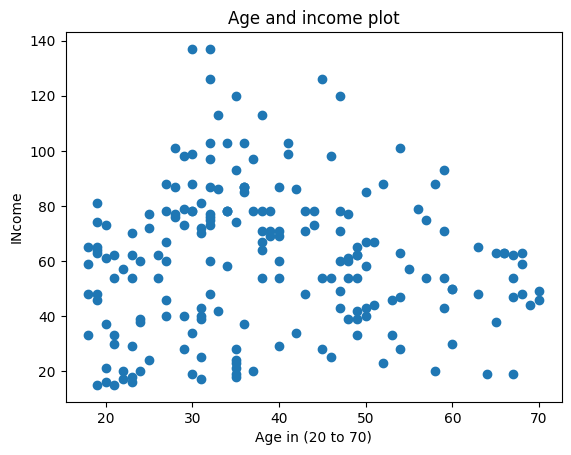

In [12]:
plt.scatter(df.age, df.income)
plt.xlabel('Age in (20 to 70)')
plt.ylabel('INcome')
plt.title('Age and income plot')

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


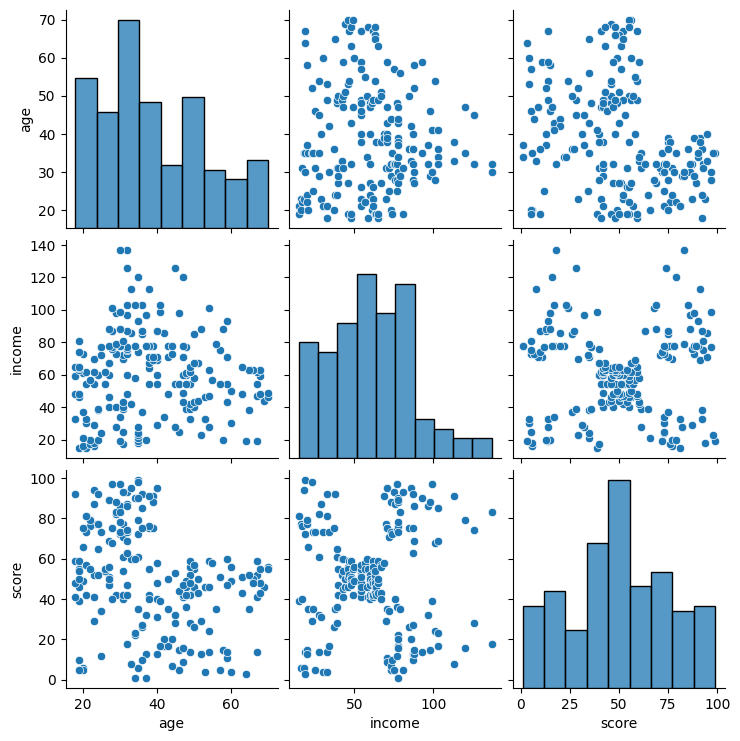

In [13]:
sns.pairplot(df[['age','income','score']])

Text(0.5, 1.0, 'Score and income plot')

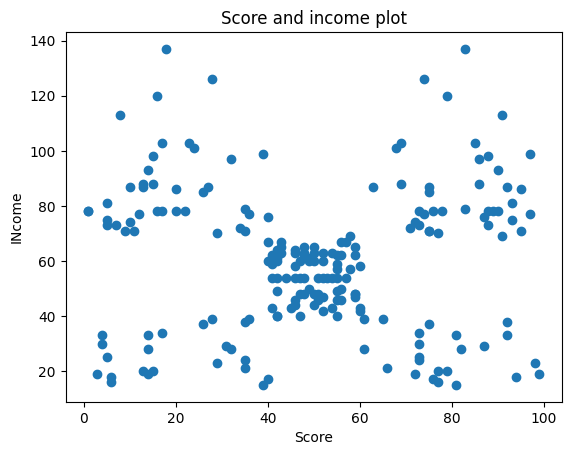

In [14]:
plt.scatter(df.score, df.income)
plt.xlabel('Score')
plt.ylabel('INcome')
plt.title('Score and income plot')

In [15]:
from sklearn.cluster import KMeans

In [16]:
km = KMeans()

In [20]:
km.fit(df[['score', 'income']])

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [23]:
df['new_cluster1'] = km.predict(df[['score', 'income']])

In [24]:
df.head()

,gender,age,income,score,new_cluster1
0,Male,19,15,39,3
1,Male,21,15,81,5
2,Female,20,16,6,3
3,Female,23,16,77,5
4,Female,31,17,40,3


In [25]:
df0 = df[df.new_cluster1 == 0]

In [26]:
df0.head()

,gender,age,income,score,new_cluster1
40,Female,65,38,35,0
42,Male,48,39,36,0
43,Female,31,39,61,0
45,Female,24,39,65,0
46,Female,50,40,55,0


Text(0.5, 1.0, 'Score and income plot')

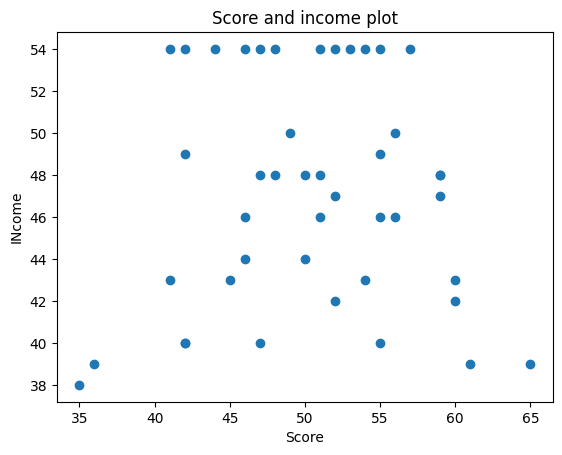

In [27]:
plt.scatter(df0.score, df0.income)
plt.xlabel('Score')
plt.ylabel('INcome')
plt.title('Score and income plot')

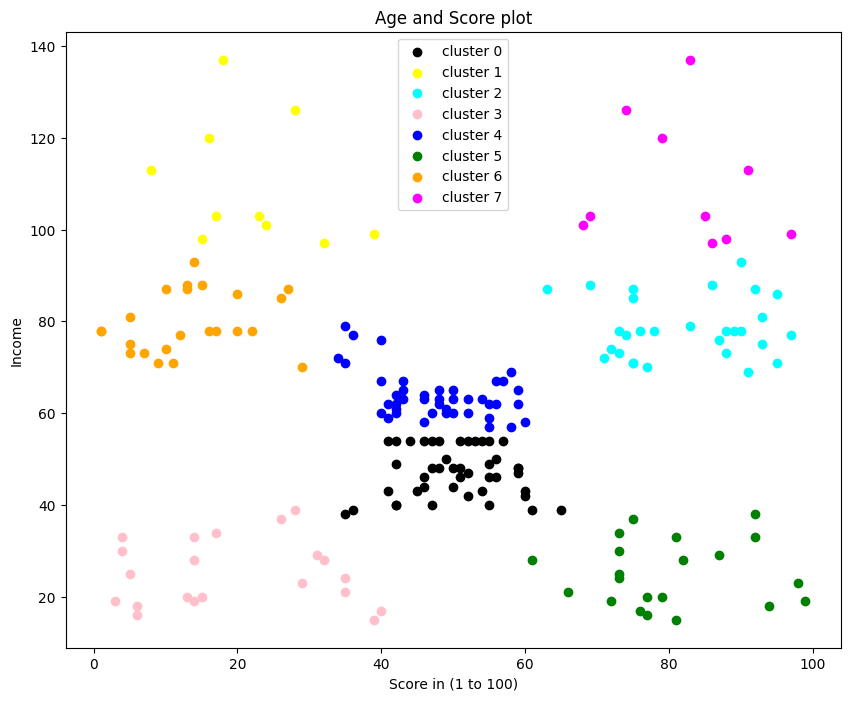

In [28]:
df0 = df[df.new_cluster1 == 0]
df1 = df[df.new_cluster1 == 1]
df2 = df[df.new_cluster1 == 2]
df3 = df[df.new_cluster1 == 3]
df4 = df[df.new_cluster1 == 4]
df5 = df[df.new_cluster1 == 5]
df6 = df[df.new_cluster1 == 6]
df7 = df[df.new_cluster1 == 7]

plt.figure(figsize=(10,8))

plt.scatter(df0.score , df0.income, color='black', label='cluster 0')
plt.scatter(df1.score , df1.income, color='yellow', label='cluster 1')
plt.scatter(df2.score , df2.income, color='cyan', label='cluster 2')
plt.scatter(df3.score , df3.income, color='pink', label='cluster 3')
plt.scatter(df4.score , df4.income, color='blue', label='cluster 4')
plt.scatter(df5.score , df5.income, color='green', label='cluster 5')
plt.scatter(df6.score , df6.income, color='orange', label='cluster 6')
plt.scatter(df7.score , df7.income, color='magenta', label='cluster 7')

plt.xlabel('Score in (1 to 100)')
plt.ylabel('Income')
plt.title('Age and Score plot')

plt.legend()
plt.show()

In [29]:
centrer1 = km.cluster_centers_
centrer1

array([[ 50.36363636,  47.06818182],
       [ 22.        , 109.7       ],
       [ 82.17241379,  78.55172414],
       [ 19.52380952,  25.14285714],
       [ 47.66666667,  63.80952381],
       [ 80.04761905,  25.0952381 ],
       [ 13.39130435,  79.73913043],
       [ 82.        , 109.7       ]])

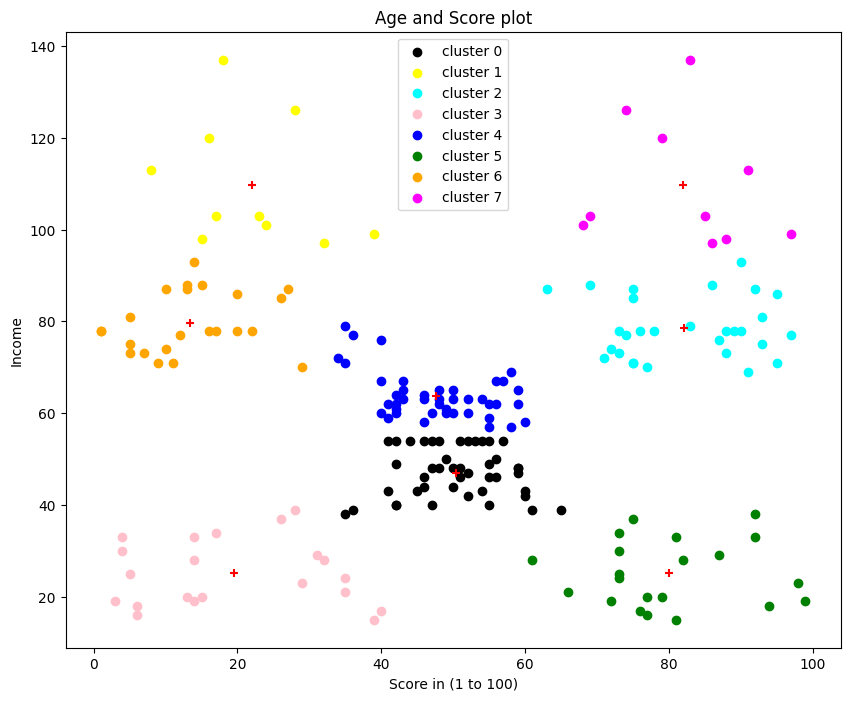

In [59]:
df0 = df[df.new_cluster1 == 0]
df1 = df[df.new_cluster1 == 1]
df2 = df[df.new_cluster1 == 2]
df3 = df[df.new_cluster1 == 3]
df4 = df[df.new_cluster1 == 4]
df5 = df[df.new_cluster1 == 5]
df6 = df[df.new_cluster1 == 6]
df7 = df[df.new_cluster1 == 7]

plt.figure(figsize=(10,8))

plt.scatter(df0.score , df0.income, color='black', label='cluster 0')
plt.scatter(df1.score , df1.income, color='yellow', label='cluster 1')
plt.scatter(df2.score , df2.income, color='cyan', label='cluster 2')
plt.scatter(df3.score , df3.income, color='pink', label='cluster 3')
plt.scatter(df4.score , df4.income, color='blue', label='cluster 4')
plt.scatter(df5.score , df5.income, color='green', label='cluster 5')
plt.scatter(df6.score , df6.income, color='orange', label='cluster 6')
plt.scatter(df7.score , df7.income, color='magenta', label='cluster 7')

plt.scatter(centrer1[:,0], centrer1[:,1], color='red', marker='+')

plt.xlabel('Score in (1 to 100)')
plt.ylabel('Income')
plt.title('Age and Score plot')

plt.legend()
plt.show()

In [40]:
wcss = []
clusters_range = range(1,15)
for k in clusters_range:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['score', 'income']])
    wcss.append(km2.inertia_)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

In [41]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [42]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30566.45113025186,
 25037.601066566283,
 22155.14949036471,
 19634.55462934998,
 18002.7251004214,
 16005.711196674481,
 14503.34932243761,
 13136.954711207269]

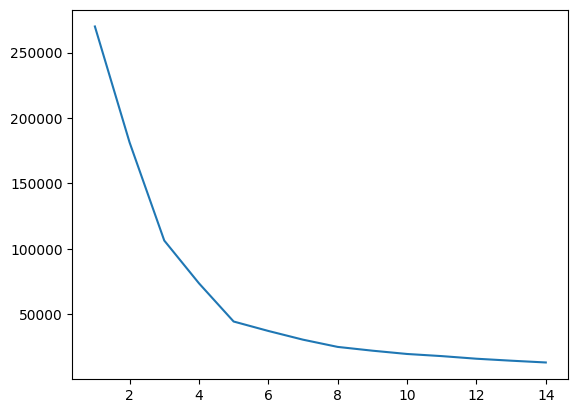

In [43]:
plt.plot(clusters_range, wcss) 

In [49]:
from kneed import KneeLocator
kn = KneeLocator(clusters_range, wcss, curve='convex' , direction='decreasing')

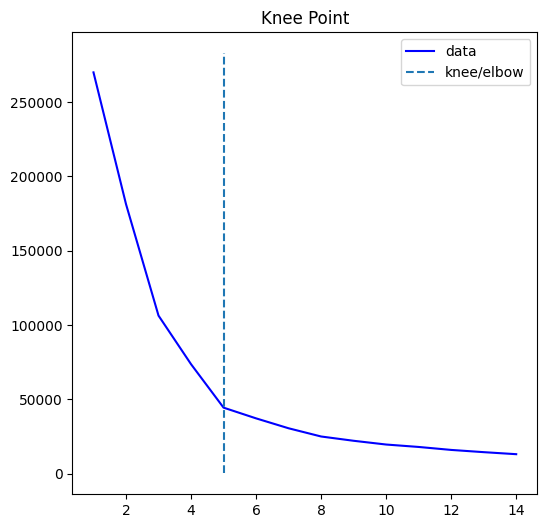

In [51]:
kn.plot_knee() 

In [52]:
kn.knee

5

In [55]:
km3= KMeans(n_clusters=5)
km3.fit(df[['score', 'income']])

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [56]:
df['optimized_clusters']= km3.predict(df[['score','income']])

In [61]:
centrer2 = km3.cluster_centers_
centrer2

array([[49.51851852, 55.2962963 ],
       [79.36363636, 25.72727273],
       [82.12820513, 86.53846154],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783]])

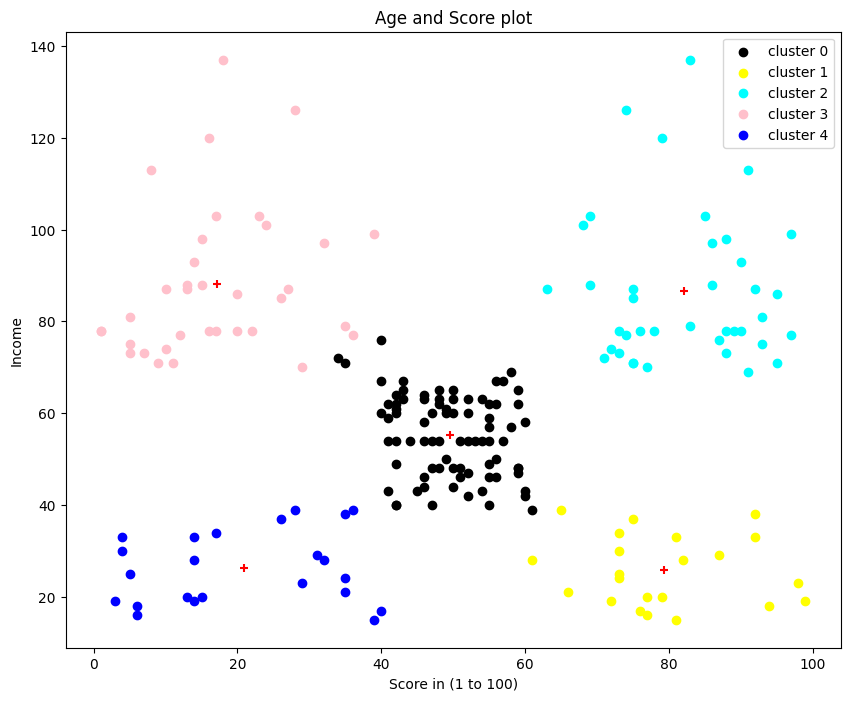

In [64]:
df0 = df[df.optimized_clusters == 0]
df1 = df[df.optimized_clusters == 1]
df2 = df[df.optimized_clusters == 2]
df3 = df[df.optimized_clusters == 3]
df4 = df[df.optimized_clusters == 4]


plt.figure(figsize=(10,8))

plt.scatter(df0.score , df0.income, color='black', label='cluster 0')
plt.scatter(df1.score , df1.income, color='yellow', label='cluster 1')
plt.scatter(df2.score , df2.income, color='cyan', label='cluster 2')
plt.scatter(df3.score , df3.income, color='pink', label='cluster 3')
plt.scatter(df4.score , df4.income, color='blue', label='cluster 4')


plt.scatter(centrer2[:,0], centrer2[:,1], color='red', marker='+')

plt.xlabel('Score in (1 to 100)')
plt.ylabel('Income')
plt.title('Age and Score plot')

plt.legend()
plt.show()